In [ ]:
# Load in the Ne and Nc estimates

In [1]:
Ne = read.table("./work/Ne_estimates.txt",sep = '\t', header = TRUE)
Nc = read.table("./data/Nc_estimates.txt",sep = '\t', header = TRUE)

In [2]:
Ne

Pop,Site,Lineage,Ne_est
Nome_ODD,Nome,ODD,2014.426
Nome_EVEN,Nome,EVEN,3691.296
Koppen_ODD,Koppen,ODD,2079.581
Koppen_EVEN,Koppen,EVEN,9087.463
Puget_ODD,Puget,ODD,2934.276
Puget_EVEN,Puget,EVEN,1805.562


In [3]:
Nc

Pop,Site,Lineage,Nc_est
Nome_ODD,Nome,ODD,300000
Nome_EVEN,Nome,EVEN,10000
Koppen_ODD,Koppen,ODD,200000
Koppen_EVEN,Koppen,EVEN,200000
Puget_ODD,Puget,ODD,1400000
Puget_EVEN,Puget,EVEN,4000


In [4]:
## Use the merge command to join them

In [5]:
estimates = merge(Ne, Nc)
estimates

Pop,Site,Lineage,Ne_est,Nc_est
Koppen_EVEN,Koppen,EVEN,9087.463,200000
Koppen_ODD,Koppen,ODD,2079.581,200000
Nome_EVEN,Nome,EVEN,3691.296,10000
Nome_ODD,Nome,ODD,2014.426,300000
Puget_EVEN,Puget,EVEN,1805.562,4000
Puget_ODD,Puget,ODD,2934.276,1400000


In [6]:
estimates$ratio = estimates$Ne_est / estimates$Nc_est
# reorder to match input order
estimates$Pop <- factor(estimates$Pop , levels =c('Nome_ODD','Nome_EVEN', 'Koppen_ODD', 'Koppen_EVEN', 'Puget_ODD', 'Puget_EVEN'))
estimates = estimates[order(estimates$Pop),]
estimates

,Pop,Site,Lineage,Ne_est,Nc_est,ratio
4,Nome_ODD,Nome,ODD,2014.426,300000,0.006714752
3,Nome_EVEN,Nome,EVEN,3691.296,10000,0.369129596
2,Koppen_ODD,Koppen,ODD,2079.581,200000,0.010397905
1,Koppen_EVEN,Koppen,EVEN,9087.463,200000,0.045437316
6,Puget_ODD,Puget,ODD,2934.276,1400000,0.002095911
5,Puget_EVEN,Puget,EVEN,1805.562,4000,0.451390566


In [ ]:
for_barplot = data.matrix(t(estimates[,c('Ne_est', 'Nc_est')]))
colnames(for_barplot) = estimates$Pop

for_ratio_barplot = data.matrix(t(estimates[,'ratio']))
colnames(for_ratio_barplot) = estimates$Pop

In [47]:

png('./plots/Ne estimates.png')
par(mar=c(10,4,4,2))
barplot(for_barplot['Ne_est',], col = "white", beside = TRUE, las=2, #axes = FALSE, 
       main = "Ne estimates for each population",ylab = 'Ne')
dev.off()

png('./plots/Ne and Nc estimates.png')
par(mar=c(10,4,4,2))

barplot(for_barplot, col = c("white","black"), beside = TRUE, las=2, axes = FALSE, 
       main = "Ne and Nc estimates for each population",ylab = 'Size')
axis(side = 2, at = c(100, 10000, 500000, 1000000, 1500000))
legend("top",
  c("Ne_est","Nc_est"),
  fill = c("white","black")
)
dev.off()

# same plot with a log y axis
png('./plots/Ne and Nc estimates (log-scaled).png')
par(mar=c(10,4,4,2))
barplot(for_barplot, col = c("white","black"), beside = TRUE, las=2, 
        log = 'y', axes = FALSE, ylim = c(100,1400000), 
       main = "Ne and Nc estimates for each population",ylab = 'Size (log scaled)')
axis(side = 2, at = c(100, 10000, 500000, 1000000, 1500000))
legend("top",
  c("Ne_est","Nc_est"),
  fill = c("white","black")
)
dev.off()

png('./plots/Ne-Nc ratios.png')
par(mar=c(10,4,4,2))
barplot(for_ratio_barplot, col = "gray", beside = TRUE, las=2, #axes = FALSE, 
       main = "Ne/Nc ratios for each population",ylab = 'Ne/Nc ratio')
dev.off()


png 
  2

png 
  2

png 
  2

png 
  2

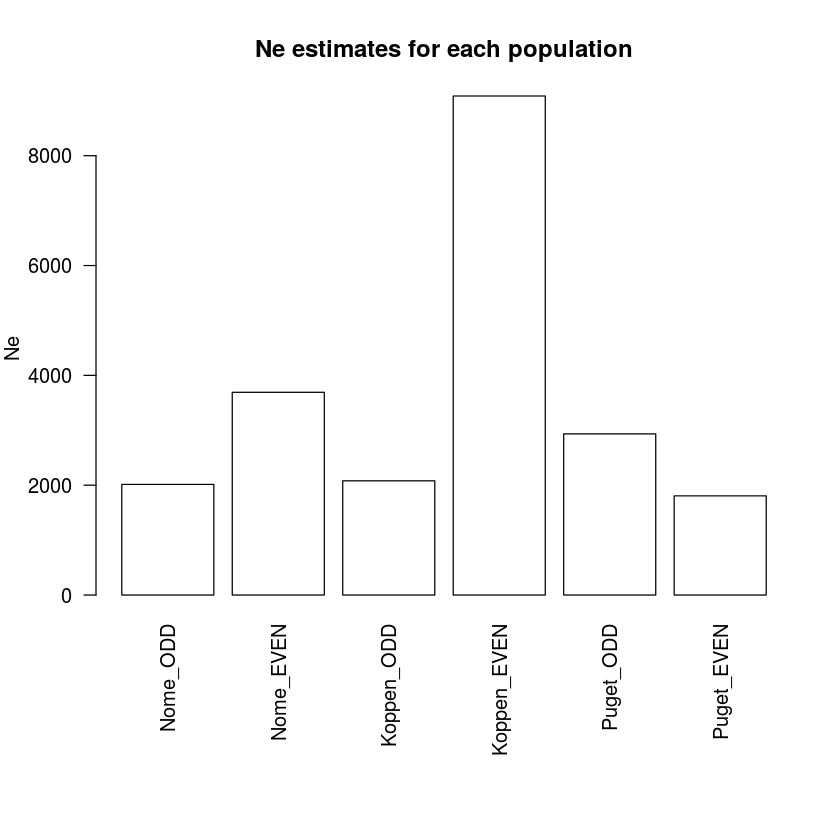

In [53]:
# Just for the notbook
par(mar=c(10,4,4,2))
barplot(for_barplot['Ne_est',], col = "white", beside = TRUE, las=2, #axes = FALSE, 
       main = "Ne estimates for each population",ylab = 'Ne')

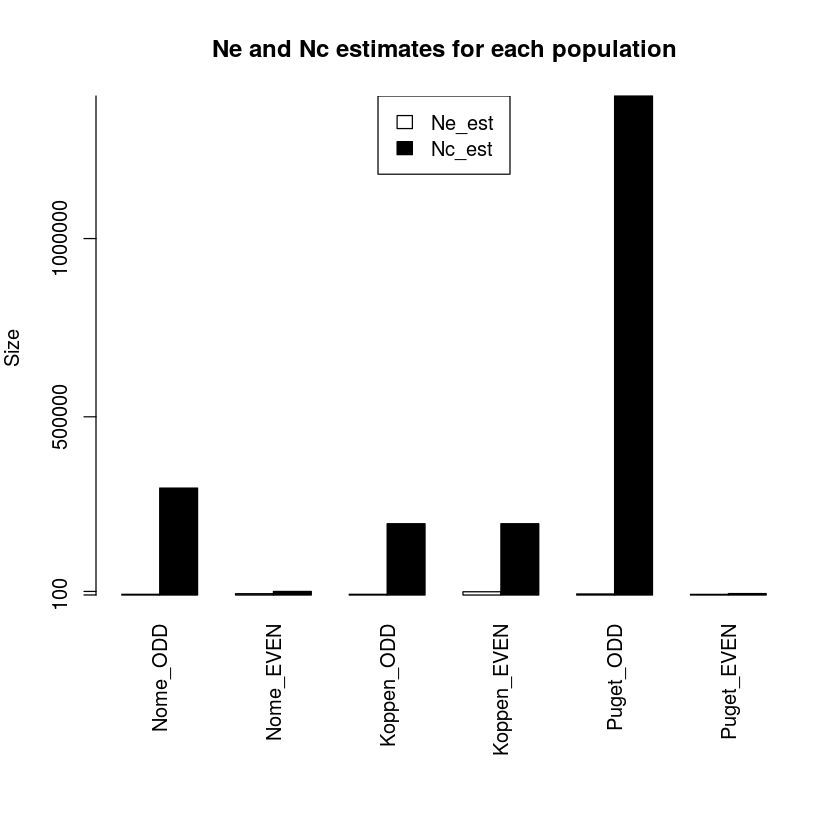

In [50]:
par(mar=c(10,4,4,2))
barplot(for_barplot, col = c("white","black"), beside = TRUE, las=2, axes = FALSE, 
       main = "Ne and Nc estimates for each population",ylab = 'Size')
axis(side = 2, at = c(100, 10000, 500000, 1000000, 1500000))
legend("top",
  c("Ne_est","Nc_est"),
  fill = c("white","black")
)

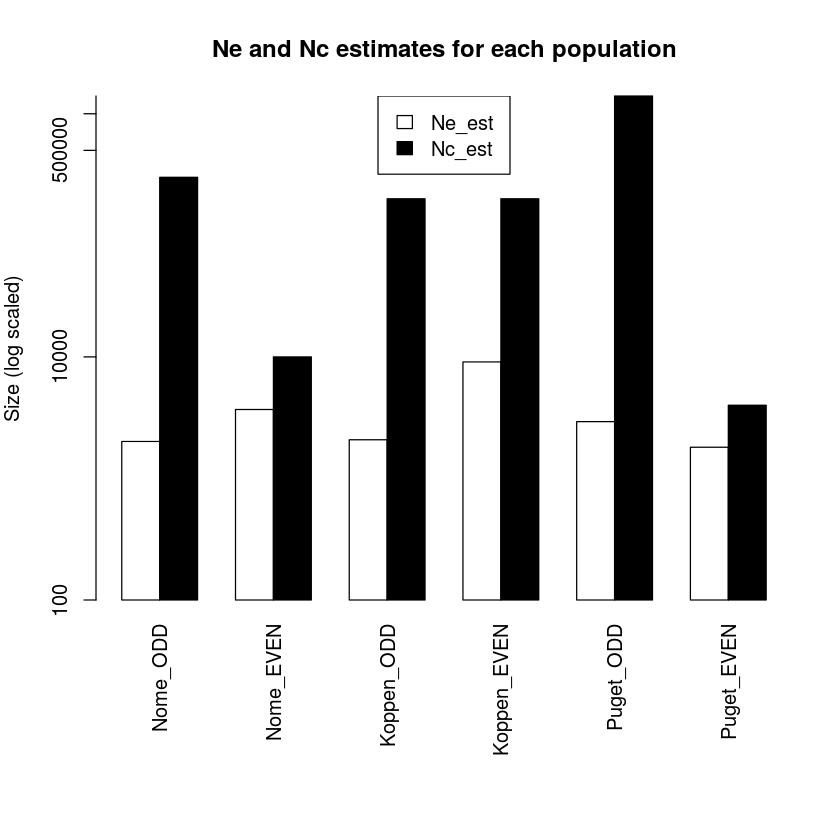

In [51]:
# same plot with a log y axis
par(mar=c(10,4,4,2))
barplot(for_barplot, col = c("white","black"), beside = TRUE, las=2, 
        log = 'y', axes = FALSE, ylim = c(100,1400000), 
       main = "Ne and Nc estimates for each population",ylab = 'Size (log scaled)')
axis(side = 2, at = c(100, 10000, 500000, 1000000, 1500000))
legend("top",
  c("Ne_est","Nc_est"),
  fill = c("white","black")
)

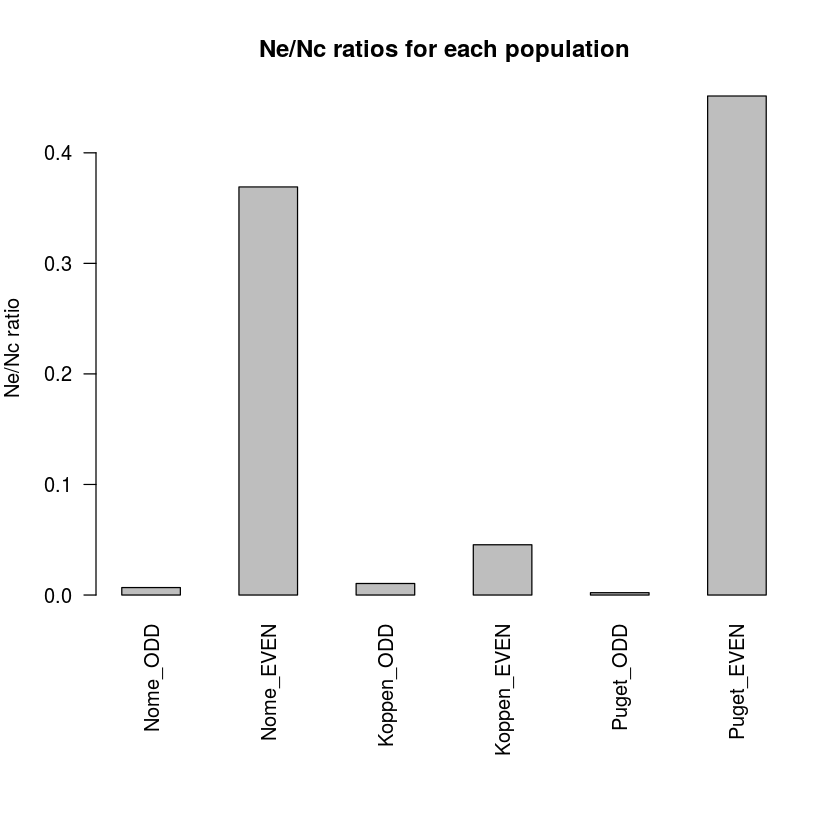

In [52]:
par(mar=c(10,4,4,2))
barplot(for_ratio_barplot, col = "gray", beside = TRUE, las=2, #axes = FALSE, 
       main = "Ne/Nc ratios for each population",ylab = 'Ne/Nc ratio')

# Plot  r2 matrices

In [54]:
source('./scripts/R_functions.r')

In [55]:
Ne_Nome_ODD = get_Ne('./work/Nome_ODD')
Ne_Nome_EVEN = get_Ne('./work/Nome_EVEN')
Ne_Koppen_ODD = get_Ne('./work/Koppen_ODD')
Ne_Koppen_EVEN = get_Ne('./work/Koppen_EVEN')
Ne_Puget_ODD = get_Ne('./work/Puget_ODD')
Ne_Puget_EVEN = get_Ne('./work/Puget_EVEN')

png('./plots/LD_Nome_ODD.png', width=nrow(Ne_Nome_ODD$r2_matrix),height=nrow(Ne_Nome_ODD$r2_matrix))
image(Ne_Nome_ODD$r2_matrix, axes = FALSE, col = rev(heat.colors(256)))
dev.off()

png('./plots/LD_Nome_EVEN.png', width=nrow(Ne_Nome_EVEN$r2_matrix),height=nrow(Ne_Nome_EVEN$r2_matrix))
image(Ne_Nome_EVEN$r2_matrix, axes = FALSE, col = rev(heat.colors(256)))
dev.off()

png('./plots/LD_Koppen_ODD.png', width=nrow(Ne_Koppen_ODD$r2_matrix),height=nrow(Ne_Koppen_ODD$r2_matrix))
image(Ne_Koppen_ODD$r2_matrix, axes = FALSE, col = rev(heat.colors(256)))
dev.off()

png('./plots/LD_Koppen_EVEN.png', width=nrow(Ne_Koppen_EVEN$r2_matrix),height=nrow(Ne_Koppen_EVEN$r2_matrix))
image(Ne_Koppen_EVEN$r2_matrix, axes = FALSE, col = rev(heat.colors(256)))
dev.off()

png('./plots/LD_Puget_ODD.png', width=nrow(Ne_Puget_ODD$r2_matrix),height=nrow(Ne_Puget_ODD$r2_matrix))
image(Ne_Puget_ODD$r2_matrix, axes = FALSE, col = rev(heat.colors(256)))
dev.off()

png('./plots/LD_Puget_EVEN.png', width=nrow(Ne_Puget_EVEN$r2_matrix),height=nrow(Ne_Puget_EVEN$r2_matrix))
image(Ne_Puget_EVEN$r2_matrix, axes = FALSE, col = rev(heat.colors(256)))
dev.off()

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2

png 
  2